In [3]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Cleaned Dataset
file_path = "C:/Users/balla/Downloads/Cleaned_Ecommerce_Dataset.xlsx"
data = pd.read_excel(file_path)

# Display Basic Information
print("Dataset Information:")
print(data.info())
print("\nDataset Head:")
print(data.head())

# Basic Statistics
print("\nDataset Summary Statistics:")
print(data.describe())

# Handling Missing Values
missing_values = data.isnull().sum()
print("\nMissing Values in the Dataset:")
print(missing_values[missing_values > 0])


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233635 entries, 0 to 233634
Data columns (total 15 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   item_id          233635 non-null  int64         
 1   status           233635 non-null  object        
 2   created_at       233635 non-null  datetime64[ns]
 3   sku              233635 non-null  object        
 4   price            233635 non-null  float64       
 5   qty_ordered      233635 non-null  int64         
 6   grand_total      233635 non-null  float64       
 7   category_name_1  233635 non-null  object        
 8   discount_amount  233635 non-null  float64       
 9   payment_method   233635 non-null  object        
 10  Year             233635 non-null  int64         
 11  Month            233635 non-null  int64         
 12  Customer Since   233635 non-null  datetime64[ns]
 13  M-Y              233635 non-null  object        
 14 

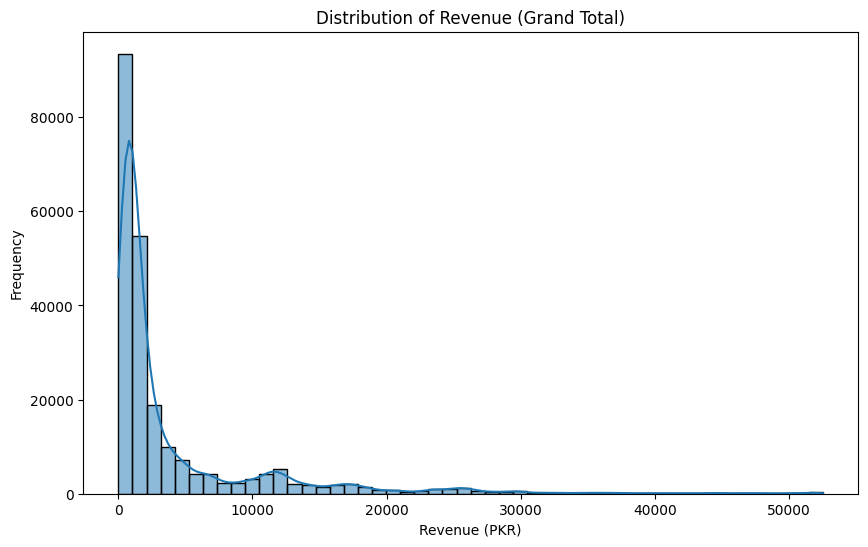

In [20]:
# 1. Revenue Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['grand_total'] < data['grand_total'].quantile(0.99)]['grand_total'], bins=50, kde=True)
plt.xlabel("Revenue (PKR)")
plt.ylabel("Frequency")
plt.title("Distribution of Revenue (Grand Total)")
plt.show()



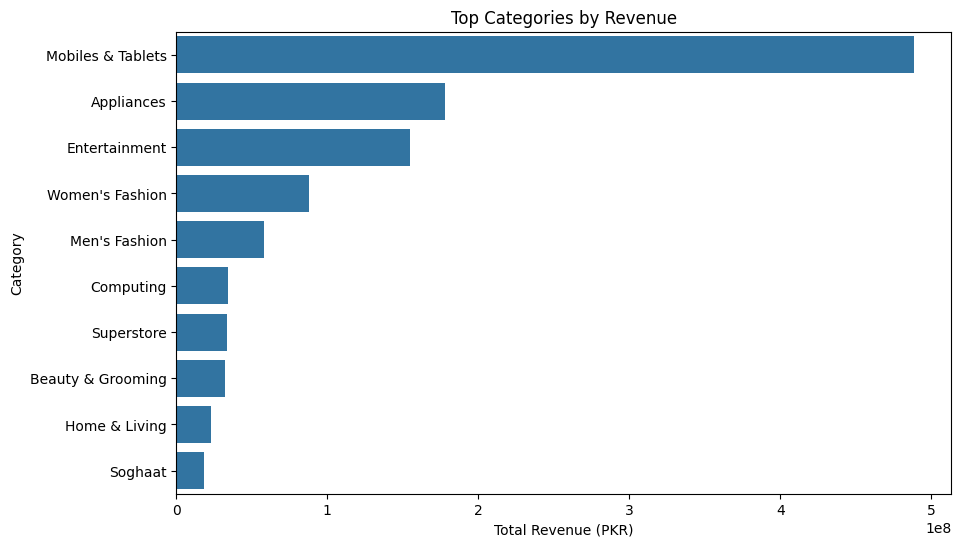

In [21]:
plt.figure(figsize=(10, 6))
category_revenue = data.groupby('category_name_1')['grand_total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=category_revenue.values, y=category_revenue.index)
plt.xlabel("Total Revenue (PKR)")
plt.ylabel("Category")
plt.title("Top Categories by Revenue")
plt.show()

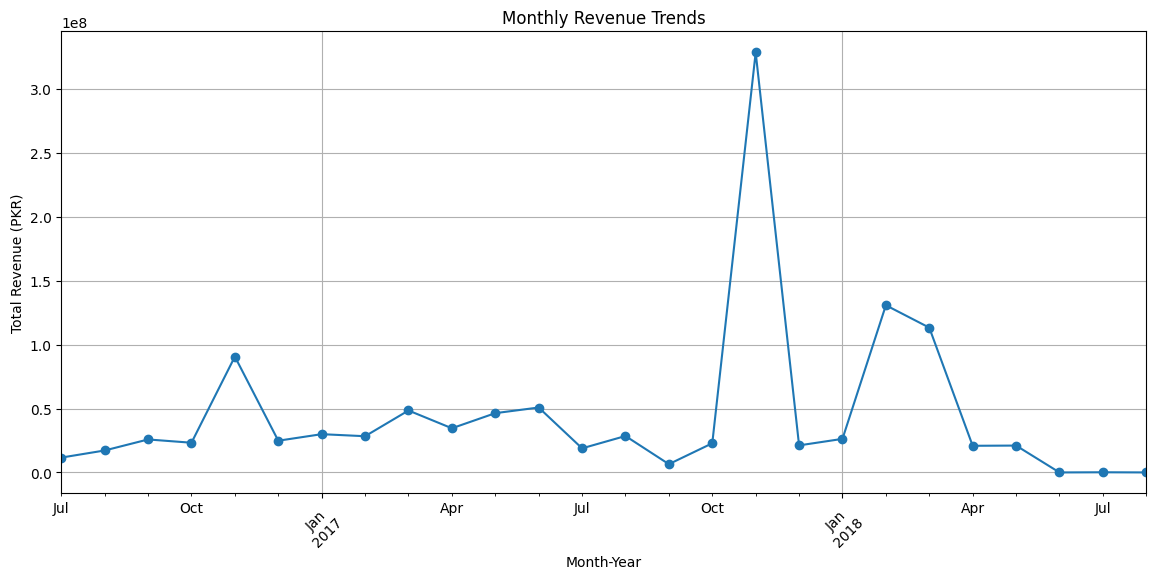

In [9]:
# 3. Monthly Revenue Trends
data['created_at'] = pd.to_datetime(data['created_at'])
data['Month-Year'] = data['created_at'].dt.to_period('M')
monthly_revenue = data.groupby('Month-Year')['grand_total'].sum()
plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue Trends")
plt.xlabel("Month-Year")
plt.ylabel("Total Revenue (PKR)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

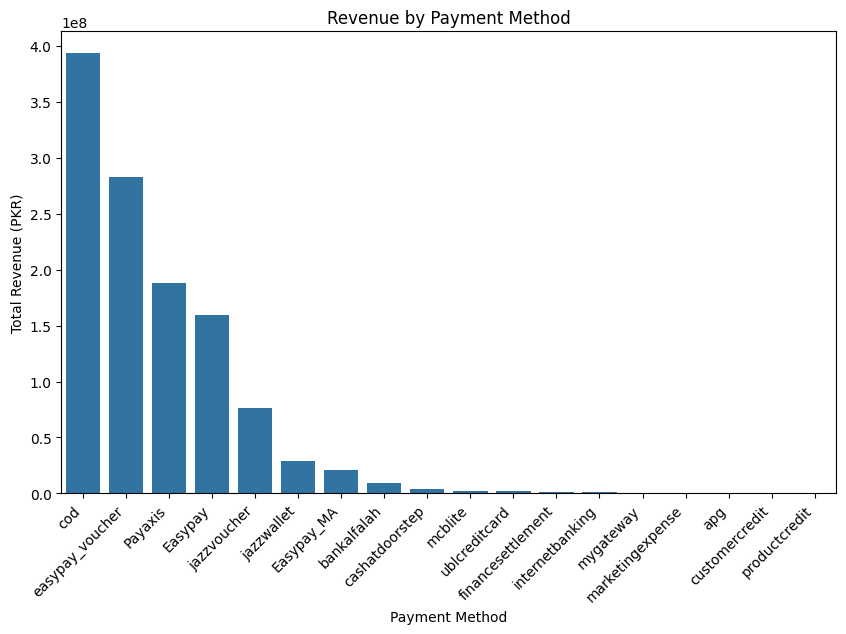

In [22]:
# 4. Payment Method Analysis
plt.figure(figsize=(10, 6))
payment_revenue = data.groupby('payment_method')['grand_total'].sum().sort_values(ascending=False)
sns.barplot(x=payment_revenue.index, y=payment_revenue.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel("Payment Method")
plt.ylabel("Total Revenue (PKR)")
plt.title("Revenue by Payment Method")
plt.show()


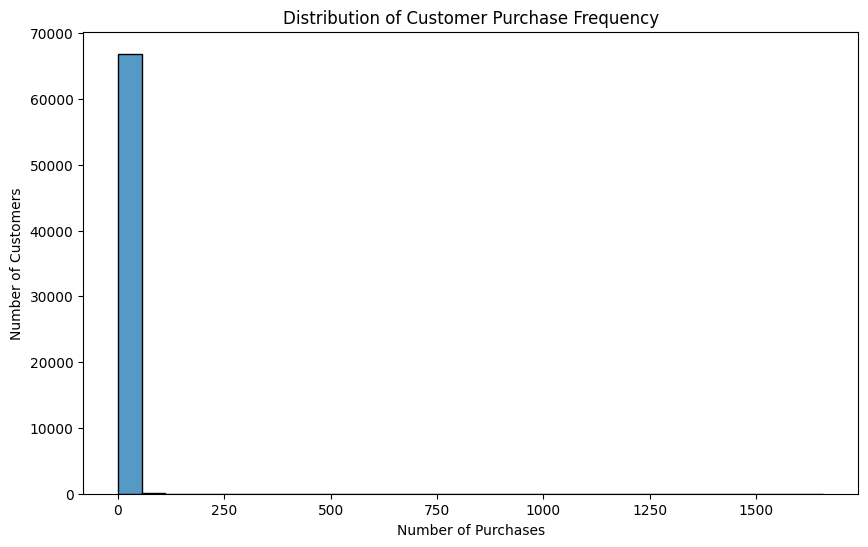

In [23]:
# 5. Customer Purchase Frequency
plt.figure(figsize=(10, 6))
customer_purchase_frequency = data['Customer ID'].value_counts()
sns.histplot(customer_purchase_frequency, bins=30, kde=False)
plt.xlabel("Number of Purchases")
plt.ylabel("Number of Customers")
plt.title("Distribution of Customer Purchase Frequency")
plt.show()


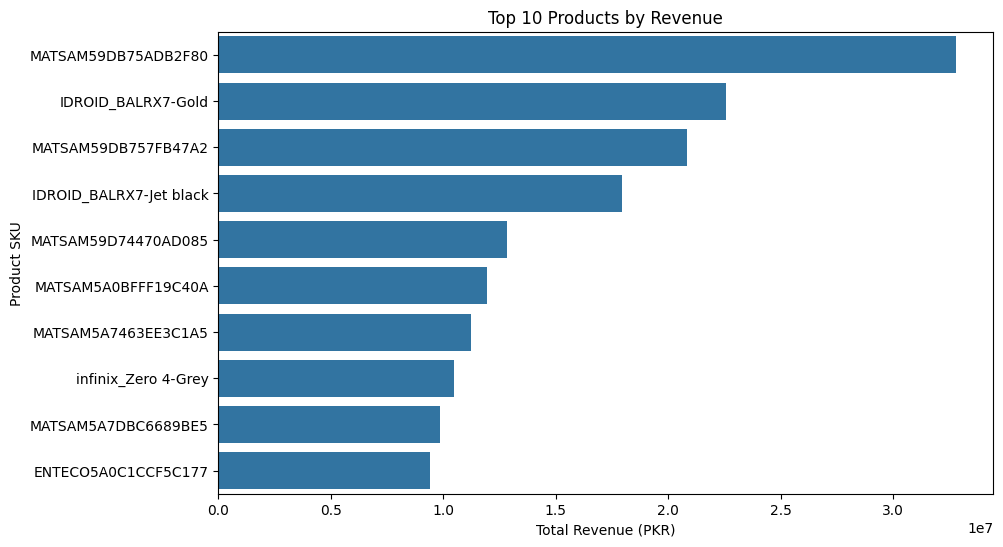

In [24]:
# 6. Top 10 Products by Revenue
plt.figure(figsize=(10, 6))
product_revenue = data.groupby('sku')['grand_total'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=product_revenue.values, y=product_revenue.index)
plt.xlabel("Total Revenue (PKR)")
plt.ylabel("Product SKU")
plt.title("Top 10 Products by Revenue")
plt.show()


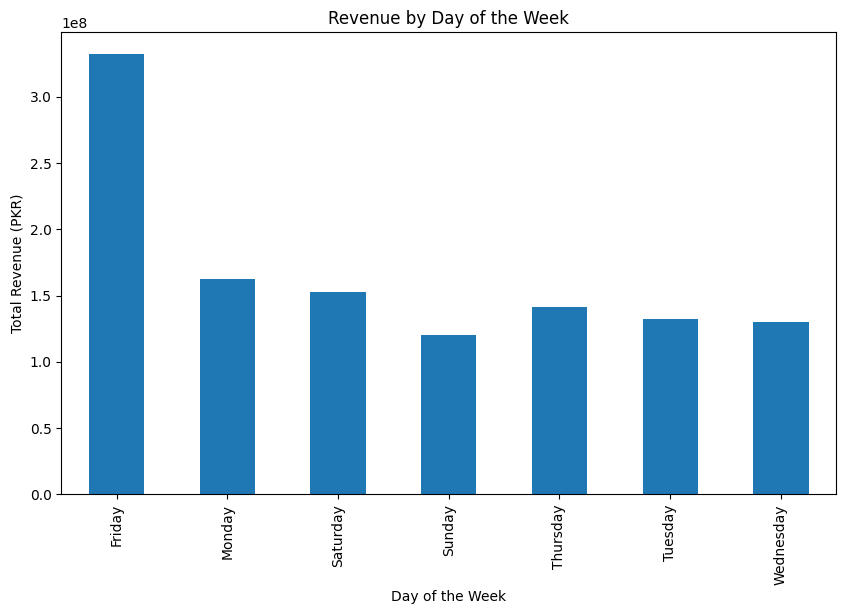

In [14]:
# 7. Day of the Week Analysis
data['Day of Week'] = data['created_at'].dt.day_name()
day_revenue = data.groupby('Day of Week')['grand_total'].sum()
plt.figure(figsize=(10, 6))
day_revenue.sort_index().plot(kind='bar')
plt.title("Revenue by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Total Revenue (PKR)")
plt.show()

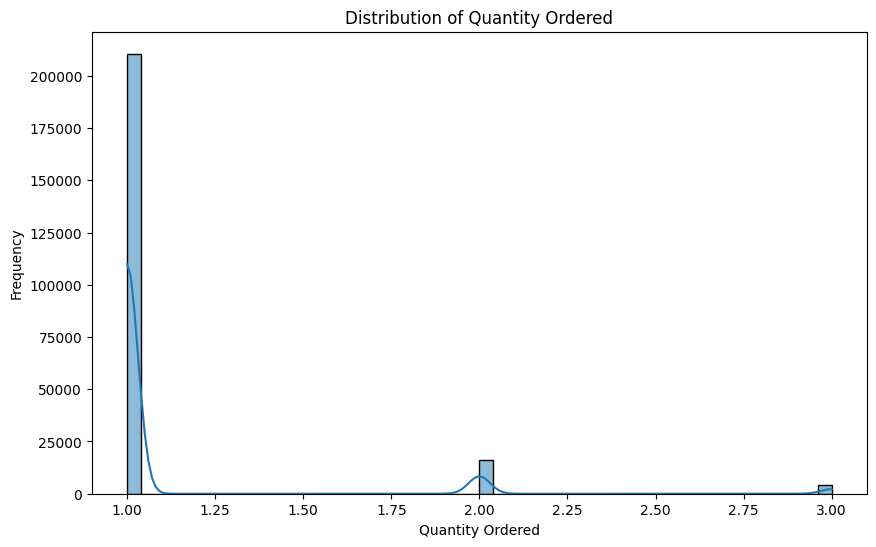

In [25]:
# 8. Quantity Ordered Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data[data['qty_ordered'] < data['qty_ordered'].quantile(0.99)]['qty_ordered'], bins=50, kde=True)
plt.xlabel("Quantity Ordered")
plt.ylabel("Frequency")
plt.title("Distribution of Quantity Ordered")
plt.show()



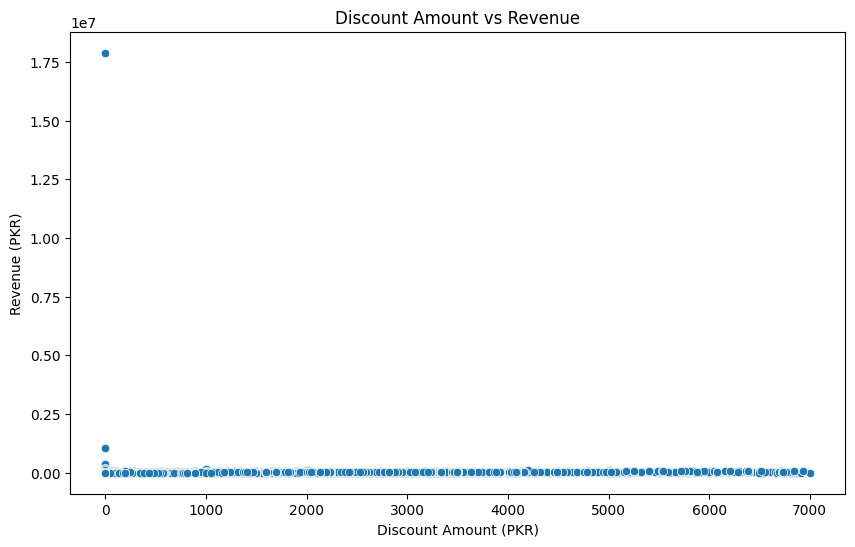

In [26]:
# 9. Discounts vs Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data[data['discount_amount'] < data['discount_amount'].quantile(0.99)],
                x='discount_amount', y='grand_total')
plt.xlabel("Discount Amount (PKR)")
plt.ylabel("Revenue (PKR)")
plt.title("Discount Amount vs Revenue")
plt.show()



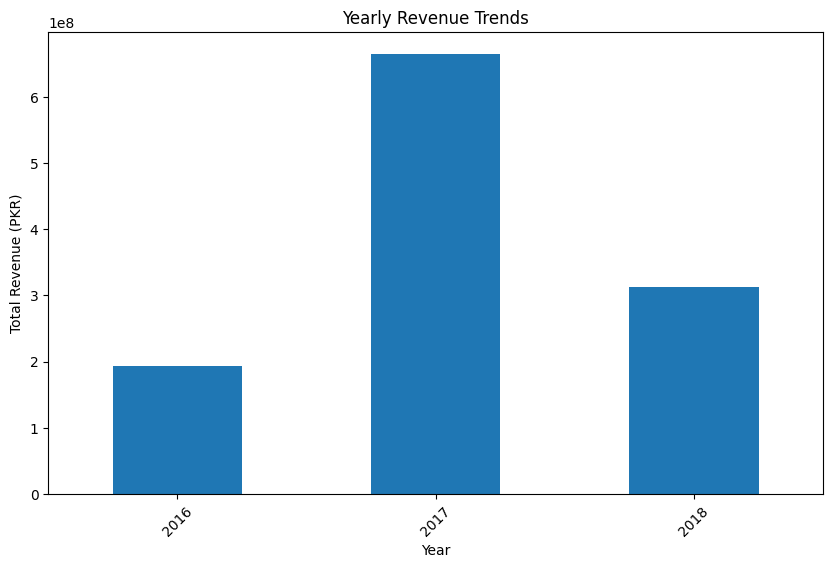

In [17]:
# 10. Revenue by Year
data['Year'] = data['created_at'].dt.year
yearly_revenue = data.groupby('Year')['grand_total'].sum()
plt.figure(figsize=(10, 6))
yearly_revenue.plot(kind='bar')
plt.title("Yearly Revenue Trends")
plt.xlabel("Year")
plt.ylabel("Total Revenue (PKR)")
plt.xticks(rotation=45)
plt.show()


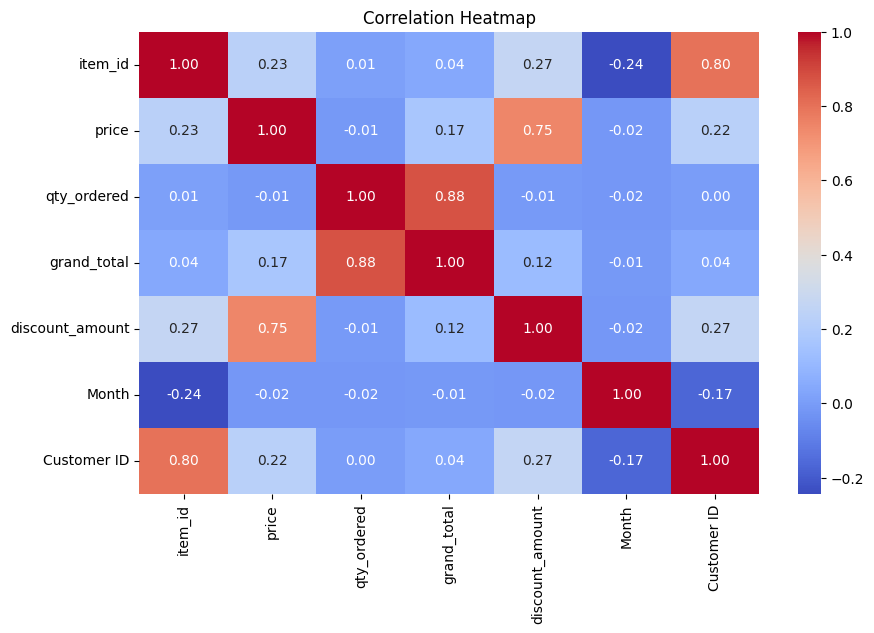

In [19]:
# Correlation Analysis
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
